In [92]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
packages for dataload and simulation
"""
import ffn # data access
from arch import arch_model  # simulation

"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vsl path
sys.path.insert(0, "C:\\user\\noob\\")

import codelib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and manipulate data

In [94]:
prices = ffn.get('aapl,msft, fing-b.st', start = '2018-01-01')
returns = df.to_returns().dropna()
log_returns = df.to_log_returns().dropna()
cum_returns = prices.rebase()

<AxesSubplot:xlabel='Date'>

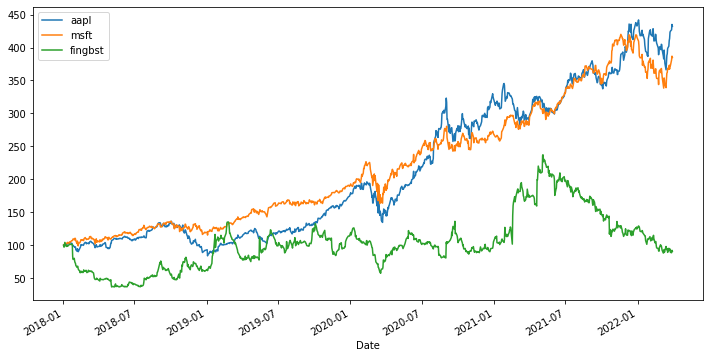

In [95]:
cum_returns.plot(figsize = (12, 6))

## Modelling and simulation

Iteration:      1,   Func. Count:      6,   Neg. LLF: 17450.821511350587
Iteration:      2,   Func. Count:     14,   Neg. LLF: 700876.9999120701
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5897.201155802995
Iteration:      4,   Func. Count:     27,   Neg. LLF: 5805.959855817937
Iteration:      5,   Func. Count:     33,   Neg. LLF: 762871893.4078914
Iteration:      6,   Func. Count:     39,   Neg. LLF: 6037.1664344863575
Iteration:      7,   Func. Count:     45,   Neg. LLF: 7598.76622869246
Iteration:      8,   Func. Count:     53,   Neg. LLF: 5776.903333531685
Iteration:      9,   Func. Count:     58,   Neg. LLF: 5776.832699027924
Iteration:     10,   Func. Count:     63,   Neg. LLF: 5776.830292872166
Iteration:     11,   Func. Count:     68,   Neg. LLF: 5776.830201885364
Iteration:     12,   Func. Count:     73,   Neg. LLF: 5776.830174223226
Iteration:     13,   Func. Count:     77,   Neg. LLF: 5776.830174224749
Optimization terminated successfully    (Exit mode 0)
         

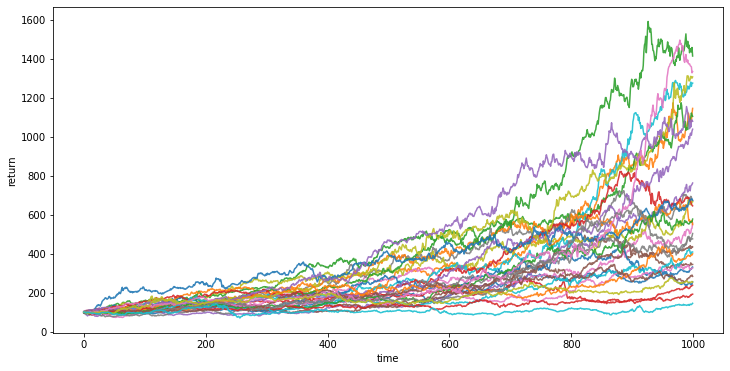

In [74]:
# FIT MODEL
np.random.seed(0)
n_sims = 30
stock = 'aapl'
n_time_points = 1000
am = arch_model(returns[stock] * 100, mean = "AR", vol = "garch") # fit garch model
am_fit = am.fit()


# SIMULATE DATA
fig, ax = plt.subplots(figsize = (12, 6))
ax.set(xlabel = "time", ylabel = "return")


for _ in range(n_sims):
    simulation = am.simulate(params = am_fit.params, nobs = n_time_points) / 100
    sim_prices = simulation.data.to_price_index()
    
    ax.plot(sim_prices, alpha = 30)


## create features

In [80]:
df_test = pd.DataFrame({"price":sim_prices})

In [93]:
df_test.create_features()

,price,ma_5,ma_50
0,101.614024,NaN,NaN
1,101.402373,NaN,NaN
2,100.082214,NaN,NaN
3,97.798550,NaN,NaN
4,98.563107,99.892054,NaN
...,...,...,...
995,142.042971,138.530570,132.369102
996,140.886539,139.105876,132.894457
997,139.719133,139.065386,133.345430
998,143.003547,140.329717,133.836271
